In [12]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

In [4]:
data=pd.read_csv("mnist_train.csv")

In [20]:
data.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
a=data.iloc[2,1:].values

In [22]:
data.shape

(60000, 785)

In [39]:
a=a.reshape(28,28).astype('uint8')

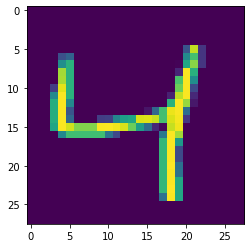

In [42]:
plt.imshow(a)

In [43]:
df_x=data.iloc[:,1:]
df_y=data.iloc[:,0]

In [44]:
x_train,x_test,y_train,y_test=train_test_split(df_x,df_y,test_size=0.2,random_state=4)

In [45]:
x_train.head()

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
20379,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
53032,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
27005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30510,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
508,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [46]:
y_train.head()

20379    4
53032    4
27005    7
30510    8
508      1
Name: label, dtype: int64

In [47]:
rf=RandomForestClassifier(n_estimators=100)

In [48]:
rf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [49]:
pred=rf.predict(x_test)

In [50]:
pred

array([2, 7, 6, ..., 6, 4, 2], dtype=int64)

In [51]:
a=y_test.values

In [52]:
count=0
for i in range(len(pred)):
    if pred[i]==a[i]:
        count=count+1

In [53]:
count

11610

In [54]:
total=len(pred)

In [55]:
total

12000

In [56]:
(count/total)*100

96.75